# Table of Contents
 <p>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import LogNorm
import tensorflow as tf
import time

In [10]:
def costfunc(x, y, m, b):
    """Compute the MSE cost of a prediction based on m, b.
    x: inputs array.
    y: observed outputs array.
    m, b: regression parameters.
    Returns: a scalar cost.
    """
    yhat = m * x + b
    diff = yhat - y
    # Vectorized computation using a dot product to compute sum of squares.
    cost = np.dot(diff.T, diff) / float(x.shape[0])
    # Cost is a 1x1 matrix, we need a scalar.
    return cost.flat[0]




In [3]:
np.random.seed(72)
N = 1024
x_data = np.linspace(-2.0, 2.0, N)
y_data = x_data * 2.25 + 6 + np.random.normal(loc=0, scale=1.5, size=N)
x_data1 = np.concatenate(([x_data], [np.ones_like(x_data)]), axis=0).T
y_store = y_data
x_store = x_data

In [8]:
np.random.seed(72)
batchsize = [1024,16,1]
ep = [850,13,8]
points_List = []
CostL_List = []
for bsize in zip(batchsize,ep):
    tf.reset_default_graph()
    tf.set_random_seed(42)
    x = tf.placeholder(tf.float32, shape=[None, 2], name='x')
    y = tf.placeholder(tf.float32, shape=[None, 1], name='y')
    m = tf.Variable(tf.random_uniform([2, 1],-5, -5))#tf.random_uniform([1, 1], 2, 2)
    #b = tf.Variable(tf.ones([1,1]))#tf.random_uniform([1, 1], 6, 6)


    y_ = tf.matmul(x, m)
    loss = tf.reduce_mean(tf.square(tf.subtract(y_ , y)))
    optimizer = tf.train.GradientDescentOptimizer(0.005)
    train = optimizer.minimize(loss)
    init = tf.global_variables_initializer()
    # Launch the graph.
    sess = tf.Session()
    sess.run(init)
    ts = time.time()
    # Fit the line.
    mini_batch_size = bsize[0]
    n_batch = N // mini_batch_size + (N % mini_batch_size != 0)
    points = []
    randomize = np.arange(x_data1.shape[0])


    for step in range(bsize[1]):
        np.random.shuffle(randomize)
        x_data1 = x_data1[randomize]
        y_data =  y_data[randomize]
        print(x_data1[0])
        print(y_data[0])
        for nn in range(n_batch):
            points.append(sess.run([m]))
            i_batch = (step % n_batch)*mini_batch_size
            batch = x_data1[i_batch:i_batch+mini_batch_size],y_data[i_batch:i_batch+mini_batch_size]
            _, loss_value,mo,yo = sess.run([train,loss,m,y_], feed_dict={x: batch[0].reshape(mini_batch_size,2),y: batch[1].reshape(mini_batch_size,1)})

            if step % 1 == 0:
                print(step,loss_value,mo[0],mo[1]) #,loss_value
    dt = time.time()-ts
    points_List.append(points)
    #print(dt)
    lim = 10.0
    NN = 250
    ms = np.linspace(-lim, lim, NN)
    bs = np.linspace(-lim, lim, NN)
    cost = np.zeros((NN, NN))
    for m_idx in range(NN):
        for b_idx in range(NN):
            cost[m_idx, b_idx] = costfunc(x_store, y_store, ms[m_idx], bs[b_idx])

        costL = []    
    for items in points:
        costL.append( costfunc(x_data, y_data, items[0][0], items[0][1]))
    CostL_List.append(costL)  


[-1.17497556  1.        ]
2.40397323839
0 192.769 [-4.90339804] [-4.89021873]
[ 0.03323558  1.        ]
8.20600452956
1 188.517 [-4.8080864] [-4.78153515]
[-1.55816227  1.        ]
0.185904474445
2 184.362 [-4.71404839] [-4.67393827]
[-0.8113392  1.       ]
4.35238971492
3 180.301 [-4.62126637] [-4.56741762]
[-1.30009775  1.        ]
3.16275252937
4 176.333 [-4.52972412] [-4.46196222]
[-0.41642229  1.        ]
3.85309734651
5 172.455 [-4.43940496] [-4.35756111]
[-0.06060606  1.        ]
6.05042218175
6 168.665 [-4.35029221] [-4.25420427]
[ 1.35874878  1.        ]
11.9732488341
7 164.962 [-4.26237011] [-4.15188074]
[ 0.45943304  1.        ]
7.01911828877
8 161.343 [-4.17562246] [-4.0505805]
[ 1.21016618  1.        ]
7.94060170963
9 157.806 [-4.09003353] [-3.9502933]
[-0.13880743  1.        ]
8.26042427678
10 154.349 [-4.00558805] [-3.85100889]
[ 1.93352884  1.        ]
9.63544011217
11 150.971 [-3.92227077] [-3.75271726]
[-1.62463343  1.        ]
4.95450312095
12 147.669 [-3.84006667] [

146 10.1779 [ 1.22969878] [ 3.47259712]
[-1.56207234  1.        ]
3.09281136354
147 10.0139 [ 1.24307573] [ 3.49765253]
[ 1.37438905  1.        ]
8.44018157437
148 9.85343 [ 1.25627398] [ 3.52245736]
[-1.42130987  1.        ]
4.2964729745
149 9.69638 [ 1.26929593] [ 3.54701424]
[-1.23753666  1.        ]
2.77435775554
150 9.54269 [ 1.28214383] [ 3.57132554]
[-1.90224829  1.        ]
3.41285557682
151 9.39228 [ 1.29482007] [ 3.59539366]
[ 1.37438905  1.        ]
8.44018157437
152 9.24508 [ 1.30732703] [ 3.61922121]
[ 0.3773216  1.       ]
7.14990837874
153 9.10102 [ 1.31966686] [ 3.64281034]
[ 0.70185728  1.        ]
4.76164547167
154 8.96003 [ 1.33184183] [ 3.66616368]
[-0.03323558  1.        ]
6.02087782732
155 8.82206 [ 1.34385419] [ 3.68928361]
[-1.46823069  1.        ]
1.23503218844
156 8.68702 [ 1.3557061] [ 3.71217227]
[-1.40957967  1.        ]
3.59061951087
157 8.55486 [ 1.36739969] [ 3.73483205]
[-1.65200391  1.        ]
2.73551557632
158 8.42551 [ 1.37893701] [ 3.75726509]
[-1.

383 2.45368 [ 2.18968248] [ 5.74670076]
[-1.3313783  1.       ]
1.73632526565
384 2.45253 [ 2.19023466] [ 5.74901533]
[-1.44868035  1.        ]
0.603441061349
385 2.45141 [ 2.19077945] [ 5.75130653]
[-1.76539589  1.        ]
0.484631389518
386 2.4503 [ 2.19131684] [ 5.75357485]
[ 0.09188661  1.        ]
8.5809182545
387 2.44922 [ 2.19184709] [ 5.75582075]
[ 0.70576735  1.        ]
10.3233037603
388 2.44816 [ 2.19237018] [ 5.75804377]
[-0.92082111  1.        ]
3.70799285568
389 2.44712 [ 2.19288635] [ 5.76024485]
[-1.85532747  1.        ]
3.70057358067
390 2.44611 [ 2.19339561] [ 5.76242399]
[-0.58455523  1.        ]
4.3739782776
391 2.44511 [ 2.1938982] [ 5.7645812]
[ 0.17008798  1.        ]
6.49557343169
392 2.44413 [ 2.19439411] [ 5.76671696]
[ 1.08504399  1.        ]
8.82929983061
393 2.44318 [ 2.19488335] [ 5.76883125]
[ 0.228739  1.      ]
5.74573944635
394 2.44224 [ 2.19536591] [ 5.77092457]
[-1.27663734  1.        ]
1.62427033684
395 2.44132 [ 2.19584203] [ 5.7729969]
[-1.171065

565 2.39811 [ 2.22743654] [ 5.94098711]
[-1.82795699  1.        ]
0.673110015153
566 2.39808 [ 2.22748423] [ 5.94135857]
[-0.05669599  1.        ]
6.07293089371
567 2.39805 [ 2.22753143] [ 5.94172621]
[ 1.87878788  1.        ]
12.5279813152
568 2.39803 [ 2.22757792] [ 5.94209051]
[ 0.12316716  1.        ]
5.04789981172
569 2.398 [ 2.2276237] [ 5.942451]
[-1.73802542  1.        ]
2.64730336515
570 2.39797 [ 2.227669] [ 5.94280815]
[ 1.13196481  1.        ]
8.15339491343
571 2.39795 [ 2.22771358] [ 5.94316149]
[-0.9599218  1.       ]
3.36943859878
572 2.39792 [ 2.22775769] [ 5.94351149]
[-0.77223851  1.        ]
1.97230751783
573 2.3979 [ 2.22780108] [ 5.94385767]
[-0.70576735  1.        ]
3.43525814704
574 2.39787 [ 2.227844] [ 5.94420052]
[-1.03812317  1.        ]
1.4339433108
575 2.39785 [ 2.2278862] [ 5.94454002]
[-0.04105572  1.        ]
5.89092197874
576 2.39783 [ 2.22792792] [ 5.94487619]
[-1.37047898  1.        ]
2.66849364142
577 2.3978 [ 2.22796917] [ 5.94520903]
[-1.4799609  1

781 2.3967 [ 2.23081565] [ 5.97390509]
[ 1.59726295  1.        ]
11.6159664359
782 2.3967 [ 2.23081827] [ 5.97394753]
[-0.54545455  1.        ]
2.36059924034
783 2.3967 [ 2.23082089] [ 5.97398949]
[ 0.56109482  1.        ]
7.41886064836
784 2.3967 [ 2.23082352] [ 5.97403097]
[-0.13880743  1.        ]
8.26042427678
785 2.3967 [ 2.23082614] [ 5.97407198]
[-0.36168133  1.        ]
5.79616622971
786 2.3967 [ 2.23082852] [ 5.97411251]
[ 1.29618768  1.        ]
7.47764614126
787 2.3967 [ 2.23083091] [ 5.97415304]
[-0.13489736  1.        ]
6.30785672152
788 2.3967 [ 2.23083329] [ 5.9741931]
[-0.1427175  1.       ]
8.72632068717
789 2.3967 [ 2.23083568] [ 5.97423267]
[ 1.17497556  1.        ]
8.39029390253
790 2.3967 [ 2.23083806] [ 5.97427177]
[ 1.18670577  1.        ]
8.70341757716
791 2.3967 [ 2.23084044] [ 5.9743104]
[-0.13880743  1.        ]
8.26042427678
792 2.3967 [ 2.23084283] [ 5.97434855]
[ 0.7487781  1.       ]
8.09117277399
793 2.3967 [ 2.23084497] [ 5.97438669]
[-0.89345064  1.   

2 9.37957 [ 0.98889244] [ 3.6736939]
2 9.25734 [ 1.00285602] [ 3.69388795]
2 9.13733 [ 1.01668608] [ 3.71390152]
2 9.01951 [ 1.03038394] [ 3.73373604]
2 8.90384 [ 1.04395092] [ 3.75339317]
2 8.79027 [ 1.05738819] [ 3.77287436]
2 8.67876 [ 1.07069707] [ 3.79218125]
2 8.56929 [ 1.08387887] [ 3.81131554]
2 8.4618 [ 1.0969348] [ 3.83027864]
2 8.35628 [ 1.10986602] [ 3.84907198]
2 8.25267 [ 1.12267375] [ 3.867697]
2 8.15096 [ 1.13535917] [ 3.88615537]
2 8.05109 [ 1.14792347] [ 3.90444851]
2 7.95304 [ 1.16036785] [ 3.9225781]
2 7.85677 [ 1.17269349] [ 3.94054532]
2 7.76226 [ 1.1849016] [ 3.95835161]
2 7.66946 [ 1.19699323] [ 3.97599864]
2 7.57835 [ 1.20896947] [ 3.9934876]
2 7.48891 [ 1.22083151] [ 4.01081991]
2 7.40109 [ 1.23258042] [ 4.02799702]
2 7.31486 [ 1.24421728] [ 4.0450201]
2 7.23021 [ 1.25574315] [ 4.06189108]
[-1.78494624  1.        ]
2.23098686875
3 4.14893 [ 1.26298141] [ 4.07426596]
3 4.10808 [ 1.2700932] [ 4.08650494]
3 4.06826 [ 1.27708054] [ 4.09860992]
3 4.02944 [ 1.283945

8 1.56195 [ 2.40608668] [ 5.72492695]
8 1.56146 [ 2.4076395] [ 5.72508001]
8 1.56097 [ 2.40917683] [ 5.72522783]
8 1.5605 [ 2.41069889] [ 5.72537041]
8 1.56003 [ 2.4122057] [ 5.72550821]
8 1.55958 [ 2.41369748] [ 5.72564077]
8 1.55913 [ 2.41517448] [ 5.72576857]
8 1.55869 [ 2.41663671] [ 5.72589159]
8 1.55826 [ 2.41808438] [ 5.72600985]
8 1.55784 [ 2.41951752] [ 5.72612333]
8 1.55743 [ 2.42093658] [ 5.72623253]
8 1.55703 [ 2.42234135] [ 5.72633743]
8 1.55664 [ 2.42373228] [ 5.72643757]
8 1.55625 [ 2.42510939] [ 5.72653341]
8 1.55587 [ 2.4264729] [ 5.72662544]
8 1.5555 [ 2.42782283] [ 5.72671318]
8 1.55513 [ 2.4291594] [ 5.72679663]
8 1.55478 [ 2.43048263] [ 5.72687626]
8 1.55443 [ 2.43179274] [ 5.72695208]
8 1.55408 [ 2.43308997] [ 5.7270236]
[ 0.09579668  1.        ]
4.30837245668
9 1.31687 [ 2.43002415] [ 5.73104429]
9 1.3118 [ 2.42701697] [ 5.73501301]
9 1.30687 [ 2.4240675] [ 5.73893023]
9 1.3021 [ 2.42117476] [ 5.7427969]
9 1.29747 [ 2.41833782] [ 5.7466135]
9 1.29299 [ 2.41555572

[ 1.39784946  1.        ]
12.1484218864
0 582.627 [-4.66259193] [-4.75862312]
0 548.714 [-4.33515072] [-4.52437687]
0 516.775 [-4.01738214] [-4.29705]
0 486.695 [-3.70900011] [-4.07643843]
0 458.366 [-3.40972781] [-3.86234355]
0 431.686 [-3.11929584] [-3.65457296]
0 406.559 [-2.83744335] [-3.45293999]
0 382.894 [-2.56391668] [-3.25726318]
0 360.607 [-2.29847002] [-3.0673666]
0 339.617 [-2.04086447] [-2.88307953]
0 319.849 [-1.79086852] [-2.70423627]
0 301.232 [-1.54825747] [-2.53067613]
0 283.698 [-1.31281304] [-2.36224294]
0 267.185 [-1.08432364] [-2.19878507]
0 251.632 [-0.86258376] [-2.04015589]
0 236.986 [-0.64739406] [-1.88621247]
0 223.191 [-0.43856102] [-1.73681653]
0 210.2 [-0.23589689] [-1.59183371]
0 197.965 [-0.03921941] [-1.45113373]
0 186.442 [ 0.15164824] [-1.31458998]
0 175.59 [ 0.3368777] [-1.18207967]
0 165.369 [ 0.51663554] [-1.05348372]
0 155.744 [ 0.69108331] [-0.92868644]
0 146.678 [ 0.86037797] [-0.80757564]
0 138.141 [ 1.02467167] [-0.69004244]
0 130.1 [ 1.184112

0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17

0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
0 1.30967e-10 [ 6.42213631] [ 3.17123079]
[-0.48680352  1.        ]
3.32058229156
1 9.78525 [ 6.39247561] [ 3.13994932]
1 9.41712 [ 6.36337805] [ 3.10926199]
1 9.06284 [ 6.33483315] [ 3.07915735]
1 8.72189 [ 6.30683041] [ 3.04962444]
1 8.39377 [ 6.27935934] [ 3.02065253]
1 8.07799 [ 6.25240993] [ 2.99223065]
1 7.77409 [ 6.22597218] [ 2.96434855]
1 7.48162 [ 6.20003653] [ 2.93699598]
1 7.20016 [ 6.17459345] [ 2.91016293]
1 6.92928 [ 6.14963388] [ 2.88

1 0.000311948 [ 4.86892986] [ 1.53315687]
1 0.000300219 [ 4.86876535] [ 1.53298366]
1 0.000288926 [ 4.86860418] [ 1.53281367]
1 0.000278055 [ 4.86844587] [ 1.53264689]
1 0.000267596 [ 4.8682909] [ 1.53248334]
1 0.000257522 [ 4.86813879] [ 1.53232288]
1 0.000247835 [ 4.86798954] [ 1.53216541]
1 0.000238511 [ 4.86784315] [ 1.53201091]
1 0.000229539 [ 4.86769962] [ 1.5318594]
1 0.000220909 [ 4.86755848] [ 1.53171074]
1 0.000212584 [ 4.8674202] [ 1.53156495]
1 0.000204582 [ 4.86728477] [ 1.5314219]
1 0.000196907 [ 4.86715174] [ 1.53128159]
1 0.000189484 [ 4.86702108] [ 1.5311439]
1 0.000182359 [ 4.86689281] [ 1.53100884]
1 0.000175483 [ 4.86676741] [ 1.5308764]
1 0.000168889 [ 4.86664438] [ 1.53074646]
1 0.000162542 [ 4.86652327] [ 1.53061903]
1 0.000156436 [ 4.86640453] [ 1.53049397]
1 0.000150552 [ 4.86628819] [ 1.53037131]
1 0.000144873 [ 4.86617422] [ 1.53025091]
1 0.000139438 [ 4.86606216] [ 1.53013277]
1 0.000134185 [ 4.86595249] [ 1.5300169]
1 0.00012914 [ 4.86584473] [ 1.52990329]


1 4.81123e-10 [ 4.86028957] [ 1.52404451]
1 4.81123e-10 [ 4.86028957] [ 1.52404428]
1 4.81123e-10 [ 4.86028957] [ 1.52404404]
1 4.60432e-10 [ 4.86028957] [ 1.5240438]
1 4.40195e-10 [ 4.86028957] [ 1.52404356]
1 4.40195e-10 [ 4.86028957] [ 1.52404332]
1 4.40195e-10 [ 4.86028957] [ 1.52404308]
1 4.20414e-10 [ 4.86028957] [ 1.52404284]
1 4.01087e-10 [ 4.86028957] [ 1.52404261]
1 4.01087e-10 [ 4.86028957] [ 1.52404237]
1 4.01087e-10 [ 4.86028957] [ 1.52404213]
1 3.82215e-10 [ 4.86028957] [ 1.52404189]
1 3.63798e-10 [ 4.86028957] [ 1.52404165]
1 3.63798e-10 [ 4.86028957] [ 1.52404141]
1 3.63798e-10 [ 4.86028957] [ 1.52404118]
1 3.45835e-10 [ 4.86028957] [ 1.52404094]
1 3.28328e-10 [ 4.86028957] [ 1.5240407]
1 3.28328e-10 [ 4.86028957] [ 1.52404046]
1 3.28328e-10 [ 4.86028957] [ 1.52404022]
1 3.11275e-10 [ 4.86028957] [ 1.5240401]
1 3.11275e-10 [ 4.86028957] [ 1.52403998]
1 2.94676e-10 [ 4.86028957] [ 1.52403986]
1 2.94676e-10 [ 4.86028957] [ 1.52403975]
1 2.94676e-10 [ 4.86028957] [ 1.52403

2 45.7408 [ 3.47699928] [ 2.56915879]
2 43.258 [ 3.38994789] [ 2.63492966]
2 40.91 [ 3.30529189] [ 2.69889069]
2 38.6895 [ 3.22296548] [ 2.76109147]
2 36.5895 [ 3.14290452] [ 2.82158065]
2 34.6034 [ 3.06504655] [ 2.88040543]
2 32.7252 [ 2.98933125] [ 2.93761134]
2 30.9489 [ 2.91569948] [ 2.99324298]
2 29.269 [ 2.8440938] [ 3.04734373]
2 27.6803 [ 2.77445865] [ 3.0999558]
2 26.1779 [ 2.70673966] [ 3.15112019]
2 24.757 [ 2.64088416] [ 3.20087647]
2 23.4132 [ 2.57684088] [ 3.24926376]
2 22.1424 [ 2.51455998] [ 3.29631948]
2 20.9405 [ 2.45399284] [ 3.34208035]
2 19.8039 [ 2.39509249] [ 3.3865819]
2 18.7289 [ 2.3378129] [ 3.42985892]
2 17.7123 [ 2.2821095] [ 3.47194505]
2 16.7509 [ 2.22793913] [ 3.51287293]
2 15.8417 [ 2.17525935] [ 3.55267453]
2 14.9818 [ 2.12402916] [ 3.59138083]
2 14.1686 [ 2.07420874] [ 3.62902212]
2 13.3996 [ 2.02575922] [ 3.66562748]
2 12.6723 [ 1.97864306] [ 3.70122552]
2 11.9844 [ 1.93282342] [ 3.73584414]
2 11.3339 [ 1.88826466] [ 3.76951003]
2 10.7187 [ 1.84493208

2 8.96806e-07 [ 0.31401089] [ 4.95892191]
2 8.47822e-07 [ 0.3139987] [ 4.95893097]
2 8.01921e-07 [ 0.31398684] [ 4.95894003]
2 7.58127e-07 [ 0.3139753] [ 4.95894861]
2 7.17177e-07 [ 0.3139641] [ 4.9589572]
2 6.78149e-07 [ 0.31395319] [ 4.9589653]
2 6.41739e-07 [ 0.31394258] [ 4.95897341]
2 6.06335e-07 [ 0.31393227] [ 4.95898104]
2 5.74101e-07 [ 0.31392223] [ 4.95898867]
2 5.42747e-07 [ 0.31391248] [ 4.95899582]
2 5.13639e-07 [ 0.313903] [ 4.95900297]
2 4.85334e-07 [ 0.3138938] [ 4.95901012]
2 4.59122e-07 [ 0.31388482] [ 4.9590168]
2 4.34266e-07 [ 0.31387609] [ 4.95902348]
2 4.10713e-07 [ 0.3138676] [ 4.95902967]
2 3.88411e-07 [ 0.31385934] [ 4.95903587]
2 3.67309e-07 [ 0.31385133] [ 4.95904207]
2 3.47358e-07 [ 0.31384352] [ 4.95904779]
2 3.2851e-07 [ 0.31383592] [ 4.95905352]
2 3.1072e-07 [ 0.31382853] [ 4.95905924]
2 2.93942e-07 [ 0.31382135] [ 4.95906448]
2 2.78132e-07 [ 0.31381437] [ 4.95906973]
2 2.62759e-07 [ 0.31380758] [ 4.95907497]
2 2.48773e-07 [ 0.31380096] [ 4.95907974]
2 2.

2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 0.31356362] [ 4.9592495]
2 9.09495e-13 [ 

3 0.0517407 [ 0.50549805] [ 4.85579967]
3 0.0472461 [ 0.50953084] [ 4.85362625]
3 0.0431418 [ 0.51338446] [ 4.85154915]
3 0.039394 [ 0.5170669] [ 4.84956455]
3 0.0359718 [ 0.52058578] [ 4.84766769]
3 0.0328468 [ 0.52394831] [ 4.84585524]
3 0.0299933 [ 0.52716148] [ 4.84412336]
3 0.0273878 [ 0.53023189] [ 4.84246826]
3 0.0250085 [ 0.53316593] [ 4.84088707]
3 0.022836 [ 0.53596961] [ 4.83937597]
3 0.0208523 [ 0.53864878] [ 4.83793211]
3 0.0190408 [ 0.54120892] [ 4.83655214]
3 0.0173867 [ 0.54365534] [ 4.83523369]
3 0.0158763 [ 0.54599309] [ 4.83397388]
3 0.0144972 [ 0.54822701] [ 4.83276987]
3 0.0132378 [ 0.55036169] [ 4.83161926]
3 0.0120878 [ 0.55240154] [ 4.83051968]
3 0.0110377 [ 0.55435073] [ 4.8294692]
3 0.0100789 [ 0.55621338] [ 4.82846546]
3 0.00920327 [ 0.55799323] [ 4.82750607]
3 0.00840379 [ 0.55969405] [ 4.82658911]
3 0.00767368 [ 0.56131929] [ 4.82571316]
3 0.00700712 [ 0.56287235] [ 4.82487631]
3 0.00639842 [ 0.56435645] [ 4.82407618]
3 0.00584254 [ 0.56577462] [ 4.82331181

3 3.55271e-11 [ 0.5962801] [ 4.80687428]
3 3.27418e-11 [ 0.59628022] [ 4.80687428]
3 3.00702e-11 [ 0.59628034] [ 4.80687428]
3 2.75122e-11 [ 0.59628046] [ 4.80687428]
3 2.50679e-11 [ 0.59628057] [ 4.80687428]
3 2.50679e-11 [ 0.59628069] [ 4.80687428]
3 2.05205e-11 [ 0.59628075] [ 4.80687428]
3 2.05205e-11 [ 0.59628081] [ 4.80687428]
3 2.05205e-11 [ 0.59628087] [ 4.80687428]
3 1.84173e-11 [ 0.59628093] [ 4.80687428]
3 1.64277e-11 [ 0.59628099] [ 4.80687428]
3 1.64277e-11 [ 0.59628105] [ 4.80687428]
3 1.64277e-11 [ 0.59628111] [ 4.80687428]
3 1.45519e-11 [ 0.59628117] [ 4.80687428]
3 1.27898e-11 [ 0.59628123] [ 4.80687428]
3 1.27898e-11 [ 0.59628129] [ 4.80687428]
3 1.27898e-11 [ 0.59628135] [ 4.80687428]
3 1.27898e-11 [ 0.59628141] [ 4.80687428]
3 1.11413e-11 [ 0.59628147] [ 4.80687428]
3 9.60654e-12 [ 0.59628153] [ 4.80687428]
3 9.60654e-12 [ 0.59628159] [ 4.80687428]
3 9.60654e-12 [ 0.59628165] [ 4.80687428]
3 8.18545e-12 [ 0.59628171] [ 4.80687428]
3 6.87805e-12 [ 0.59628177] [ 4.806

3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80687428]
3 2.04636e-12 [ 0.59628242] [ 4.80

4 0.0912405 [ 0.81027931] [ 4.60379648]
4 0.0874299 [ 0.81339514] [ 4.60083961]
4 0.0837786 [ 0.81644523] [ 4.59794521]
4 0.0802798 [ 0.81943095] [ 4.59511185]
4 0.0769271 [ 0.82235366] [ 4.59233809]
4 0.0737142 [ 0.82521468] [ 4.58962297]
4 0.0706357 [ 0.82801533] [ 4.58696508]
4 0.0676856 [ 0.83075684] [ 4.58436346]
4 0.0648589 [ 0.83344048] [ 4.58181667]
4 0.0621501 [ 0.8360675] [ 4.57932377]
4 0.0595547 [ 0.83863908] [ 4.57688332]
4 0.0570675 [ 0.84115642] [ 4.57449436]
4 0.0546842 [ 0.8436206] [ 4.57215595]
4 0.0524003 [ 0.8460328] [ 4.56986666]
4 0.0502119 [ 0.8483941] [ 4.567626]
4 0.0481149 [ 0.85070556] [ 4.56543255]
4 0.0461055 [ 0.85296822] [ 4.56328535]
4 0.0441801 [ 0.85518312] [ 4.56118345]
4 0.0423349 [ 0.8573513] [ 4.5591259]
4 0.0405669 [ 0.85947371] [ 4.55711174]
4 0.0388727 [ 0.86155134] [ 4.55514002]
4 0.0372492 [ 0.86358511] [ 4.55320978]
4 0.0356935 [ 0.86557597] [ 4.55132055]
4 0.0342028 [ 0.8675248] [ 4.54947138]
4 0.0327745 [ 0.86943251] [ 4.54766083]
4 0.03140

4 1.0329e-07 [ 0.95776373] [ 4.46383905]
4 9.8894e-08 [ 0.95776707] [ 4.46383572]
4 9.47398e-08 [ 0.95777029] [ 4.46383286]
4 9.08185e-08 [ 0.95777345] [ 4.46382999]
4 8.71207e-08 [ 0.95777655] [ 4.46382713]
4 8.36376e-08 [ 0.95777959] [ 4.46382427]
4 8.00906e-08 [ 0.95778257] [ 4.46382141]
4 7.67525e-08 [ 0.95778549] [ 4.46381855]
4 7.34854e-08 [ 0.95778835] [ 4.46381569]
4 7.02894e-08 [ 0.95779115] [ 4.46381283]
4 6.72881e-08 [ 0.95779389] [ 4.46381044]
4 6.44732e-08 [ 0.95779657] [ 4.46380806]
4 6.19557e-08 [ 0.9577992] [ 4.46380568]
4 5.94883e-08 [ 0.95780176] [ 4.46380329]
4 5.69572e-08 [ 0.95780426] [ 4.46380091]
4 5.45924e-08 [ 0.95780671] [ 4.46379852]
4 5.22778e-08 [ 0.95780909] [ 4.46379614]
4 5.012e-08 [ 0.95781147] [ 4.46379375]
4 4.79033e-08 [ 0.9578138] [ 4.46379137]
4 4.57367e-08 [ 0.95781606] [ 4.46378946]
4 4.39196e-08 [ 0.95781827] [ 4.46378756]
4 4.22372e-08 [ 0.95782042] [ 4.46378565]
4 4.05876e-08 [ 0.95782256] [ 4.46378374]
4 3.88769e-08 [ 0.95782465] [ 4.46378183

4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46370029]
4 6.87805e-12 [ 0.95792788] [ 4.46

5 0.0635289 [ 0.40681922] [ 4.98863888]
5 0.060886 [ 0.40422872] [ 4.99110651]
5 0.0583528 [ 0.40169266] [ 4.99352217]
5 0.0559252 [ 0.39920992] [ 4.9958868]
5 0.0535987 [ 0.39677936] [ 4.99820185]
5 0.051369 [ 0.39439988] [ 5.00046825]
5 0.049232 [ 0.39207044] [ 5.00268698]
5 0.0471838 [ 0.38978997] [ 5.00485897]
5 0.045221 [ 0.38755745] [ 5.00698566]
5 0.0433397 [ 0.38537183] [ 5.00906754]
5 0.0415367 [ 0.38323218] [ 5.01110554]
5 0.0398087 [ 0.38113749] [ 5.01310062]
5 0.0381526 [ 0.37908685] [ 5.01505375]
5 0.0365654 [ 0.37707931] [ 5.01696587]
5 0.0350442 [ 0.37511396] [ 5.01883793]
5 0.0335863 [ 0.37318996] [ 5.02067041]
5 0.0321891 [ 0.37130639] [ 5.02246475]
5 0.0308499 [ 0.3694624] [ 5.02422094]
5 0.0295666 [ 0.36765718] [ 5.02594042]
5 0.0283367 [ 0.36588991] [ 5.02762365]
5 0.0271578 [ 0.36415979] [ 5.0292716]
5 0.0260279 [ 0.36246604] [ 5.03088474]
5 0.0249452 [ 0.3608079] [ 5.03246403]
5 0.0239074 [ 0.35918462] [ 5.03401041]
5 0.0229127 [ 0.35759547] [ 5.03552389]
5 0.0219

5 4.29457e-06 [ 0.28460181] [ 5.10505009]
5 4.11661e-06 [ 0.2845805] [ 5.10507059]
5 3.9443e-06 [ 0.28455964] [ 5.10509062]
5 3.77939e-06 [ 0.28453922] [ 5.10511017]
5 3.62344e-06 [ 0.28451923] [ 5.10512924]
5 3.47256e-06 [ 0.28449968] [ 5.10514784]
5 3.32662e-06 [ 0.28448051] [ 5.10516596]
5 3.18892e-06 [ 0.28446177] [ 5.1051836]
5 3.05747e-06 [ 0.28444341] [ 5.10520124]
5 2.93041e-06 [ 0.28442544] [ 5.10521841]
5 2.80765e-06 [ 0.28440785] [ 5.1052351]
5 2.69065e-06 [ 0.28439063] [ 5.10525131]
5 2.5792e-06 [ 0.28437376] [ 5.10526752]
5 2.4716e-06 [ 0.28435725] [ 5.10528326]
5 2.36923e-06 [ 0.2843411] [ 5.10529852]
5 2.27046e-06 [ 0.28432527] [ 5.10531378]
5 2.1752e-06 [ 0.28430977] [ 5.10532856]
5 2.08474e-06 [ 0.28429461] [ 5.10534286]
5 1.99889e-06 [ 0.28427976] [ 5.10535717]
5 1.91485e-06 [ 0.28426525] [ 5.105371]
5 1.8352e-06 [ 0.28425103] [ 5.10538435]
5 1.75976e-06 [ 0.28423712] [ 5.1053977]
5 1.68591e-06 [ 0.2842235] [ 5.10541058]
5 1.61607e-06 [ 0.28421015] [ 5.10542345]
5 1.5

5 1.11413e-11 [ 0.28358167] [ 5.10600471]
5 1.11413e-11 [ 0.28358164] [ 5.10600471]
5 1.11413e-11 [ 0.28358161] [ 5.10600471]
5 1.11413e-11 [ 0.28358158] [ 5.10600471]
5 1.11413e-11 [ 0.28358155] [ 5.10600471]
5 1.11413e-11 [ 0.28358153] [ 5.10600471]
5 1.11413e-11 [ 0.2835815] [ 5.10600471]
5 1.11413e-11 [ 0.28358147] [ 5.10600471]
5 1.11413e-11 [ 0.28358144] [ 5.10600471]
5 1.11413e-11 [ 0.28358141] [ 5.10600471]
5 1.11413e-11 [ 0.28358138] [ 5.10600471]
5 1.11413e-11 [ 0.28358135] [ 5.10600471]
5 1.11413e-11 [ 0.28358132] [ 5.10600471]
5 1.11413e-11 [ 0.28358129] [ 5.10600471]
5 1.11413e-11 [ 0.28358126] [ 5.10600471]
5 8.18545e-12 [ 0.28358123] [ 5.10600471]
5 8.18545e-12 [ 0.2835812] [ 5.10600471]
5 8.18545e-12 [ 0.28358117] [ 5.10600471]
5 8.18545e-12 [ 0.28358114] [ 5.10600471]
5 8.18545e-12 [ 0.28358111] [ 5.10600471]
5 8.18545e-12 [ 0.28358108] [ 5.10600471]
5 8.18545e-12 [ 0.28358105] [ 5.10600471]
5 8.18545e-12 [ 0.28358102] [ 5.10600471]
5 8.18545e-12 [ 0.28358099] [ 5.1060

6 0.00178242 [ 1.00526321] [ 4.67826128]
6 0.00164796 [ 1.00594819] [ 4.67785549]
6 0.00152361 [ 1.0066067] [ 4.67746496]
6 0.00140864 [ 1.00723994] [ 4.67708969]
6 0.00130238 [ 1.00784886] [ 4.67672873]
6 0.00120408 [ 1.0084343] [ 4.67638159]
6 0.00111324 [ 1.0089972] [ 4.6760478]
6 0.00102923 [ 1.00953853] [ 4.67572689]
6 0.000951557 [ 1.010059] [ 4.67541838]
6 0.000879757 [ 1.01055944] [ 4.67512178]
6 0.000813369 [ 1.01104057] [ 4.67483664]
6 0.000752016 [ 1.01150322] [ 4.67456245]
6 0.000695279 [ 1.01194811] [ 4.67429876]
6 0.000642821 [ 1.01237583] [ 4.67404509]
6 0.000594301 [ 1.0127871] [ 4.67380142]
6 0.000549473 [ 1.01318264] [ 4.67356682]
6 0.000508002 [ 1.01356292] [ 4.67334127]
6 0.000469666 [ 1.01392853] [ 4.67312479]
6 0.000434243 [ 1.01428008] [ 4.67291641]
6 0.000401479 [ 1.01461816] [ 4.67271614]
6 0.000371184 [ 1.01494324] [ 4.6725235]
6 0.00034318 [ 1.01525581] [ 4.67233849]
6 0.000317293 [ 1.01555634] [ 4.67216015]
6 0.000293352 [ 1.0158453] [ 4.67198896]
6 0.000271

6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66

6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66771317]
6 1.11413e-11 [ 1.02306998] [ 4.66

7 0.00524454 [ 2.04990196] [ 5.35427713]
7 0.00491051 [ 2.05095005] [ 5.35497808]
7 0.00459769 [ 2.05196404] [ 5.35565615]
7 0.00430491 [ 2.05294538] [ 5.35631227]
7 0.00403073 [ 2.053895] [ 5.35694695]
7 0.00377399 [ 2.05481386] [ 5.35756111]
7 0.00353364 [ 2.05570292] [ 5.35815573]
7 0.00330854 [ 2.05656314] [ 5.35873079]
7 0.00309785 [ 2.05739546] [ 5.35928726]
7 0.00290056 [ 2.05820084] [ 5.35982561]
7 0.00271592 [ 2.05898023] [ 5.36034679]
7 0.00254293 [ 2.05973434] [ 5.36085129]
7 0.00238093 [ 2.06046414] [ 5.36133909]
7 0.0022293 [ 2.06117034] [ 5.36181116]
7 0.00208736 [ 2.06185365] [ 5.36226797]
7 0.00195448 [ 2.06251478] [ 5.36271]
7 0.00182996 [ 2.06315446] [ 5.36313772]
7 0.00171348 [ 2.06377363] [ 5.36355162]
7 0.00160427 [ 2.06437278] [ 5.36395216]
7 0.00150213 [ 2.06495237] [ 5.36433983]
7 0.00140642 [ 2.06551337] [ 5.36471462]
7 0.00131684 [ 2.06605601] [ 5.3650775]
7 0.00123301 [ 2.06658125] [ 5.36542845]
7 0.00115447 [ 2.06708932] [ 5.36576843]
7 0.00108096 [ 2.067580

7 4.81123e-10 [ 2.0822711] [ 5.37591934]
7 4.40195e-10 [ 2.08227134] [ 5.37591934]
7 4.40195e-10 [ 2.08227158] [ 5.37591934]
7 4.01087e-10 [ 2.08227181] [ 5.37591934]
7 4.01087e-10 [ 2.08227205] [ 5.37591934]
7 4.01087e-10 [ 2.08227229] [ 5.37591934]
7 3.63798e-10 [ 2.08227253] [ 5.37591934]
7 3.63798e-10 [ 2.08227277] [ 5.37591934]
7 3.28328e-10 [ 2.08227301] [ 5.37591934]
7 3.28328e-10 [ 2.08227324] [ 5.37591934]
7 3.28328e-10 [ 2.08227348] [ 5.37591934]
7 3.28328e-10 [ 2.08227372] [ 5.37591934]
7 2.94676e-10 [ 2.08227396] [ 5.37591934]
7 2.94676e-10 [ 2.0822742] [ 5.37591934]
7 2.62844e-10 [ 2.08227444] [ 5.37591934]
7 2.62844e-10 [ 2.08227468] [ 5.37591934]
7 2.62844e-10 [ 2.08227491] [ 5.37591934]
7 2.32831e-10 [ 2.08227515] [ 5.37591934]
7 2.32831e-10 [ 2.08227539] [ 5.37591934]
7 2.04636e-10 [ 2.08227563] [ 5.37591934]
7 2.04636e-10 [ 2.08227587] [ 5.37591934]
7 2.04636e-10 [ 2.08227611] [ 5.37591934]
7 1.78261e-10 [ 2.08227634] [ 5.37591934]
7 1.78261e-10 [ 2.08227658] [ 5.3759

7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37591934]
7 5.82077e-11 [ 2.08228016] [ 5.37

In [5]:
xbar = np.average(x_data)
ybar = np.average(y_data)
m = (xbar * ybar - np.average(x_data * y_data)) / (xbar ** 2 - np.average(x_data ** 2))
b = ybar - m * xbar
print(m,b)
np.matmul(np.matmul(np.linalg.inv(np.matmul(x_data1.T,x_data1)),x_data1.T),y_data)


-0.061010513195 5.97814480767


array([ 2.2310111 ,  5.97814481])

In [6]:
np.matmul(np.array([2,5]).T,np.array([2,5]))

29

C:\Users\hes39444\Desktop\Incep0\Inception\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


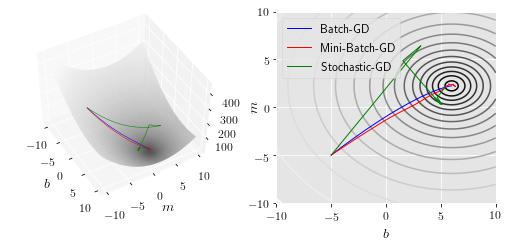

In [9]:




plt.style.use('ggplot')

     
# Update parameters for matplotlib
params = {"text.usetex": True,
          'font.size' : 12,
          "text.latex.unicode": True,
          "axes.unicode_minus": True,
          'xtick.color': 'black',
          'ytick.color': 'black',
          'axes.labelcolor': "black"
         
         }
plt.rcParams.update(params)


# Configure 3D plot.
fig = plt.figure()
fig.set_tight_layout(True)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')


left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.35   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.35   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height
plt.subplots_adjust(left, bottom, right, top,
                wspace, hspace)
# fig height and width in inch
fig.set_figheight(7.226/2)
fig.set_figwidth((7.226/3)*3)







ax1.set_xlabel('$b$')
ax1.set_ylabel('$m$')
ax1.view_init(50, -30)
ax1.set_facecolor('white')

msgrid, bsgrid = np.meshgrid(ms, bs)
surf = ax1.plot_surface(msgrid, bsgrid, cost,norm=LogNorm(), rstride=1, cstride=1, edgecolor='none',  cmap=cm.gray)
ax1.plot(np.array(points_List[0]).T.squeeze()[1],np.array(points_List[0]).T.squeeze()[0],CostL_List[0],linewidth=0.5,color = 'blue')
ax1.plot(np.array(points_List[1]).T.squeeze()[1],np.array(points_List[1]).T.squeeze()[0],CostL_List[1],linewidth=0.5,color = 'red')
ax1.plot(np.array(points_List[2]).T.squeeze()[1],np.array(points_List[2]).T.squeeze()[0],CostL_List[2],linewidth=0.5,color = 'green')



# Configure contour plot.
ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(msgrid, bsgrid, cost,levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=cm.gray)
ax2.plot(np.array(points_List[0]).T.squeeze()[1],np.array(points_List[0]).T.squeeze()[0],linewidth=1,color = 'blue',label='Batch-GD')
ax2.plot(np.array(points_List[1]).T.squeeze()[1],np.array(points_List[1]).T.squeeze()[0],linewidth=1,color = 'red',label='Mini-Batch-GD')
ax2.plot(np.array(points_List[2]).T.squeeze()[1],np.array(points_List[2]).T.squeeze()[0],linewidth=1,color = 'green',label='Stochastic-GD')


ax2.set_xlabel('$b$')
ax2.set_ylabel('$m$')
ax2.yaxis.labelpad = -12
ax2.legend(loc='upper left')
plt.draw()
plt.savefig("GD.pdf", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )
plt.show()

C:\Users\hes39444\Desktop\Incep0\Inception\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


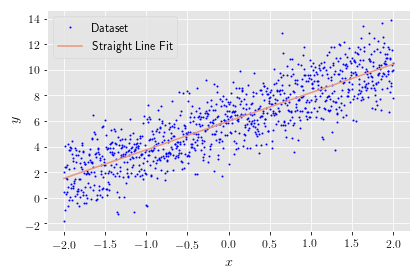

In [12]:
fig2 = plt.figure()
fig2.set_tight_layout(True)
plt.style.use('ggplot')

     
# Update parameters for matplotlib
params = {"text.usetex": True,
          'font.size' : 12,
          "text.latex.unicode": True,
          "axes.unicode_minus": True,
          'xtick.color': 'black',
          'ytick.color': 'black',
          'axes.labelcolor': "black"
         
         }
plt.rcParams.update(params)
plt.plot(x_store, y_store, 'bo',markersize= 1,label= 'Trainingsdatensatz')
plt.plot(x_store,x_store*2.2310111+5.97814481,'darksalmon',label='Ausgleichsgerade')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.draw()
plt.savefig("LSfit.pdf", 
            #This is simple recomendation for publication plots
            dpi=1000, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )
plt.show()

In [83]:
points_[1]

array([ 1.        ,  1.05393112,  1.09318757, ...,  5.85884571,
        5.84982681,  5.84684563], dtype=float32)